<div class="alert alert-success">
    
<h3> Дисциплина - Архитектура цифровых устройств и операционные системы <br>
    Тема 5. Запоминающие устройства<a class="tocSkip"> </h3>

<div style="border:solid Chocolate 2px; padding: 40px">

**Цель задания**
<br>Смоделируйте на одном графике синхросигнал с генератора.
<br>На следующем графике отобразите сигнал, соответствующий числам, передаваемым двоичным кодом SDR с синхронизацией сигналом из пункта 1:
<br>a) 7A(h)
<br>b) FF(h)
<br>c) 0F(h)
<br>На следующем графике отобразите сигнал, соответствующий числам, передаваемым двоичным кодом DDR с синхронизацией сигналом из пункта 1:
<br>a) 7A(h)
<br>b) FF(h)
<br>c) 0F(h)
<br>Сравните результаты пунктов 2 и 3, сделайте выводы.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# функция для преобразования синусоиды в прямоугольную форму с пределами 0 - 1
def my_sign(x, k, delta):
  return np.sin(k*x+delta)>0 # k - частота сигнала; delta - смещение сигнала (в данной работе не используется)

In [3]:
def my_number(x, k, slovo):
  y = []
  for el in slovo:
    y += [int(el)] * k
  y += [0] * (len(x)-len(y))
  return np.array(y)

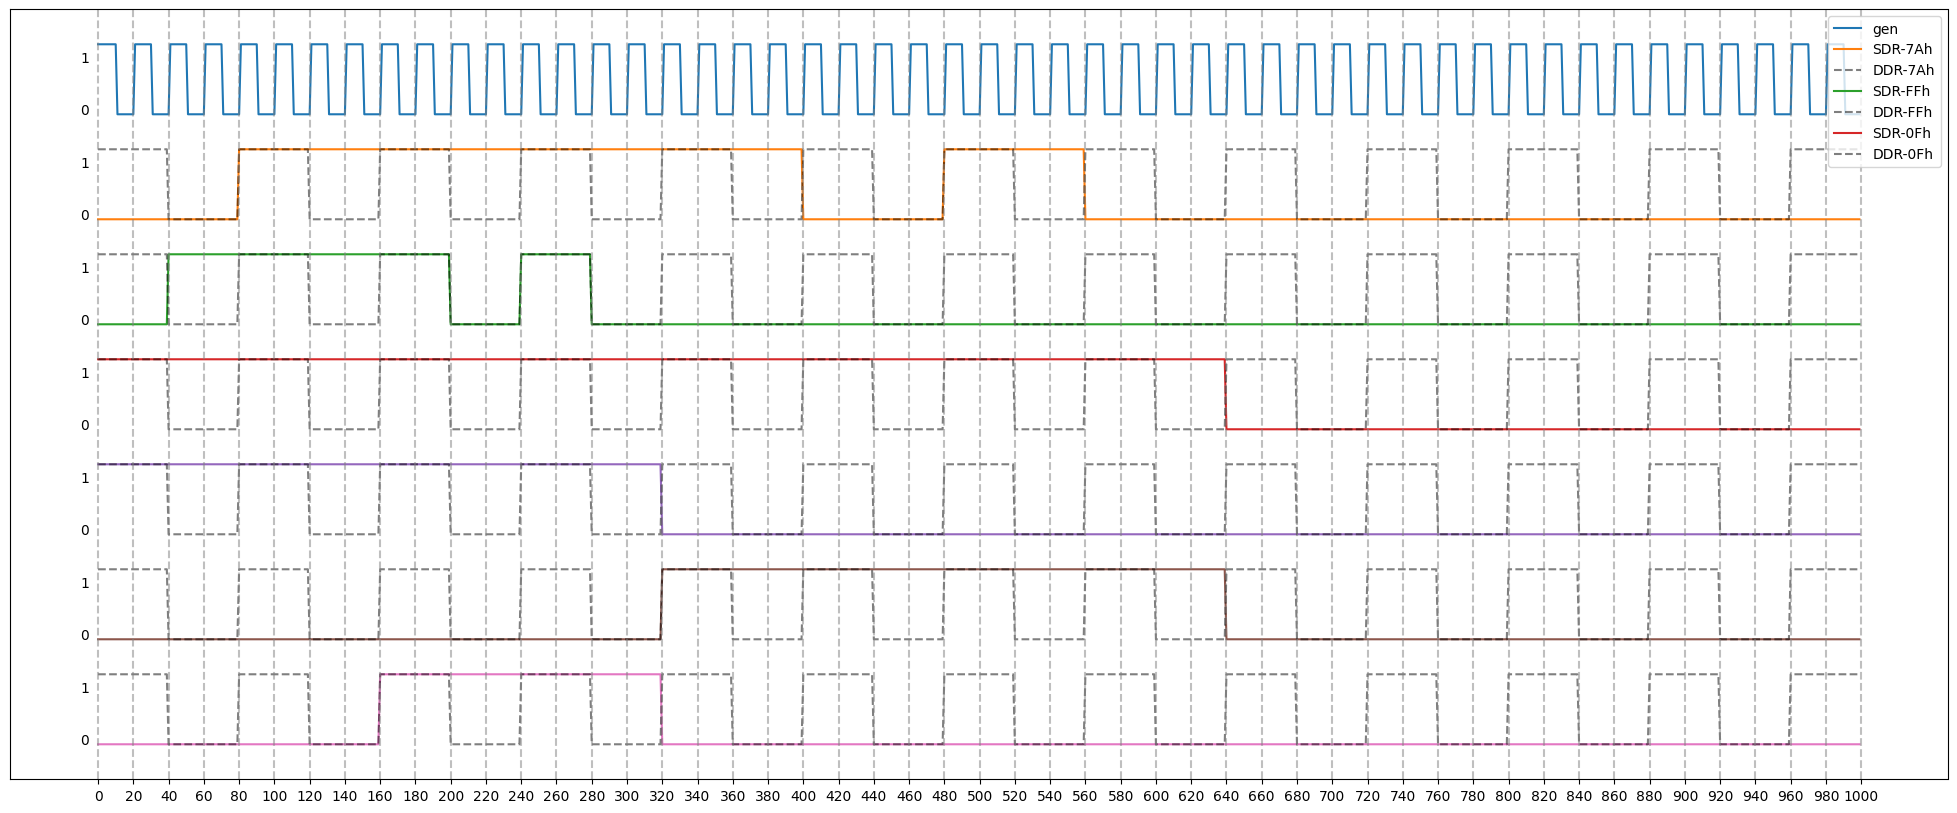

In [30]:
plt.figure(figsize=(25,10))

xcoords = [el for el in range(0, 1001, 20)]
plt.yticks([])
plt.xticks(xcoords)
text = ["0", "1"] * 7
y = 0
for label in text:
  plt.text(-10, y, label)
  y += 0.75

# формируем массивы меток времени и сигналов
t = np.arange(0, 1000, 1)
x0 = my_sign(t, 0.314, 0)
sdr = my_sign(t, 0.0786, 0)
x2 = my_number(t, 80, '01111010')
x3 = my_number(t, 40, '01111010')
x4 = my_number(t, 80, '11111111')
x5 = my_number(t, 40, '11111111')
x6 = my_number(t, 80, '00001111')
x7 = my_number(t, 40, '00001111')

x1[0], sdr[0] = True, True

# рисуем графики
plt.plot(t, x1+9)
plt.plot(t, x2+7.5)
plt.plot(t, sdr+7.5, '--k', alpha=0.5)
plt.plot(t, x3+6)
plt.plot(t, sdr+6, '--k', alpha=0.5)
plt.plot(t, x4+4.5)
plt.plot(t, sdr+4.5, '--k', alpha=0.5)
plt.plot(t, x5+3)
plt.plot(t, sdr+3, '--k', alpha=0.5)
plt.plot(t, x6+1.5)
plt.plot(t, sdr+1.5, '--k', alpha=0.5)
plt.plot(t, x7)
plt.plot(t, sdr,  '--k', alpha=0.5)

# рисуем вертикальные линии по изменению уровня некоторых сигналов
for xc in xcoords:
  plt.axvline(x=xc, linestyle='--', color='gray', alpha=0.5)

plt.legend(['gen', 'SDR-7Ah', 'DDR-7Ah', 'SDR-FFh', 'DDR-FFh', 'SDR-0Fh', 'DDR-0Fh'])


plt.show()

**Вывод:**
<br>По технологии DDR данные передаются в два раза быстрее, так как передача работает и по фронту, и по спаду синхроимпульса.